In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('/kaggle/input/cleaned-amazon-reviews/cleaned_amazon_reviews.csv', sep=',')
df

,title,text,label,text_count,language,cleaned_title,cleaned_text,cleaned_text_count,none_cleaned_review,cleaned_review
0,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,2,75,english,stuning even gamer,sound track beautiful paints senery mind well ...,39,Stuning even for the non-gamer This sound trac...,stuning even gamer sound track beautiful paint...
1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,2,91,english,best soundtrack ever anything,reading lot reviews saying best game soundtrac...,39,The best soundtrack ever to anything. I'm read...,best soundtrack ever anything reading lot revi...
2,Amazing!,This soundtrack is my favorite music of all ti...,2,128,english,amazing,soundtrack favorite music time hands intense s...,67,Amazing! This soundtrack is my favorite music ...,amazing soundtrack favorite music time hands i...
3,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,2,116,english,excellent soundtrack,truly like soundtrack enjoy video game music p...,68,Excellent Soundtrack I truly like this soundtr...,excellent soundtrack truly like soundtrack enj...
4,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",2,77,english,remember pull jaw floor hearing,played game know divine music every single son...,41,"Remember, Pull Your Jaw Off The Floor After He...",remember pull jaw floor hearing played game kn...
...,...,...,...,...,...,...,...,...,...,...
3999995,Unbelievable- In a Bad Way,We bought this Thomas for our son who is a hug...,1,153,english,unbelievable bad way,bought thomas son huge thomas huge set room th...,73,Unbelievable- In a Bad Way We bought this Thom...,unbelievable bad way bought thomas son huge th...
3999996,"Almost Great, Until it Broke...",My son recieved this as a birthday gift 2 mont...,1,113,english,almost great broke,son recieved birthday gift months loved even t...,52,"Almost Great, Until it Broke... My son recieve...",almost great broke son recieved birthday gift ...
3999997,Disappointed !!!,"I bought this toy for my son who loves the ""Th...",1,118,english,disappointed,bought toy son loves thomas toys need one batt...,49,Disappointed !!! I bought this toy for my son ...,disappointed bought toy son loves thomas toys ...
3999998,Classic Jessica Mitford,This is a compilation of a wide range of Mitfo...,2,38,english,classic jessica mitford,compilation wide range mitford articles best s...,17,Classic Jessica Mitford This is a compilation ...,classic jessica mitford compilation wide range...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   title                object
 1   text                 object
 2   label                int64 
 3   text_count           int64 
 4   language             object
 5   cleaned_title        object
 6   cleaned_text         object
 7   cleaned_text_count   int64 
 8   none_cleaned_review  object
 9   cleaned_review       object
dtypes: int64(3), object(7)
memory usage: 305.2+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,4000000.0,1.500000,0.500000,1.0,1.0,1.5,2.0,2.0
text_count,4000000.0,74.193102,42.299952,1.0,39.0,66.0,103.0,254.0
cleaned_text_count,4000000.0,35.558439,20.645147,0.0,18.0,31.0,49.0,159.0


In [8]:
df['language'].value_counts()

language
english                    3989860
spanish                       6902
german                        1100
french                         691
portuguese                     503
italian                        189
afrikaans                      107
somali                          97
dutch                           81
indonesian                      50
catalan                         42
vietnamese                      37
danish                          34
polish                          34
welsh                           32
croatian                        30
tagalog                         28
norwegian                       25
slovenian                       24
swedish                         20
estonian                        17
unknown                         16
turkish                         15
hungarian                       15
albanian                        13
finnish                         13
romanian                         7
swahili (macrolanguage)          7
slovak     

- there are so many languages with no balance at all 
- I am recommending working only on english while training model, and when using pre-trained model we can use multi-language model (sentiment classification one or zero shot classification)

In [9]:
df.isnull().sum()

title                    259
text                       0
label                      0
text_count                 0
language                   0
cleaned_title          58489
cleaned_text              21
cleaned_text_count         0
none_cleaned_review        0
cleaned_review             0
dtype: int64

In [10]:
df[df['cleaned_text'].isnull() == True]

,title,text,label,text_count,language,cleaned_title,cleaned_text,cleaned_text_count,none_cleaned_review,cleaned_review
294435,........,............ ..... ..... ...... ...... ..........,2,20,unknown,NaN,NaN,0,........ ............ ..... ..... ...... ........,
387985,IT SUCKED!!!!!!,A T E R R I B L E H O R R O R M O V I E! I E X...,1,46,romanian,sucked,NaN,0,IT SUCKED!!!!!! A T E R R I B L E H O R R O R ...,sucked
665162,\ | / 0 |2$7 { |) 3\/4|2!!!!!!!11111,1 |-|4\/3 3|\|{0|_||\|73|23|) 50|\/|3 |>47|-|3...,1,34,slovenian,NaN,NaN,0,\ | / 0 |2$7 { |) 3\/4|2!!!!!!!11111 1 |-|4\/3...,
1440939,llllllllllllllll llllllllllllll llllllllllllll...,|||||||||||||||||||| |||||||||| ||||||||||||||...,1,14,unknown,llllllllllllllll llllllllllllll llllllllllllll...,NaN,0,llllllllllllllll llllllllllllll llllllllllllll...,llllllllllllllll llllllllllllll llllllllllllll...
1786231,47382 75983 37483 83740!,38493 34740 47383 37054 48624 78568? 18581 286...,2,108,unknown,NaN,NaN,0,47382 75983 37483 83740! 38493 34740 47383 370...,
1989004,&#4321;&#4304;&#4311;&#4304;&#4323;&#4320;&#4312;,&#4315;&#4304;&#4306;&#4304;&#4320;&#4312;&#43...,2,18,unknown,NaN,NaN,0,&#4321;&#4304;&#4311;&#4304;&#4323;&#4320;&#43...,
2005370,&#1605;&#1593; &#1575;&#1604;&#1575;&#1587;&#1...,&#1575;&#1606;&#1578;&#1605; &#1594;&#1610;&#1...,1,20,unknown,NaN,NaN,0,&#1605;&#1593; &#1575;&#1604;&#1575;&#1587;&#1...,
2071299,&#1054;&#1090;&#1083;&#1080;&#1095;&#1085;&#1086;,&#1042;&#1089;&#1077; &#1087;&#1088;&#1080;&#1...,2,24,unknown,NaN,NaN,0,&#1054;&#1090;&#1083;&#1080;&#1095;&#1085;&#10...,
2220519,!,!!!!! ! 1 !!!!!!!!!! 234 !!!!!!!! 2 !! 34 !!!!...,2,33,unknown,NaN,NaN,0,! !!!!! ! 1 !!!!!!!!!! 234 !!!!!!!! 2 !! 34 !!...,
2282778,I like it,'''' ''' '''''' '''''' '''''' ''''' '''' '''''...,2,28,unknown,like,NaN,0,I like it '''' ''' '''''' '''''' '''''' ''''' ...,like


In [11]:
df.dropna(inplace= True)
df.isnull().sum()

title                  0
text                   0
label                  0
text_count             0
language               0
cleaned_title          0
cleaned_text           0
cleaned_text_count     0
none_cleaned_review    0
cleaned_review         0
dtype: int64

- **we had unknown language in the data set so its clearly that pandas won't be able to read it**, *so it would be fine to drop them since the data is already large*

In [12]:
print(f"Duplicates in raw text: {df['text'].duplicated().sum()}")
print(f"Duplicates in cleaned text: {df['cleaned_text'].duplicated().sum()}")

Duplicates in raw text: 5972
Duplicates in cleaned text: 7143


In [13]:
df[df['text'].duplicated()]

,title,text,label,text_count,language,cleaned_title,cleaned_text,cleaned_text_count,none_cleaned_review,cleaned_review
1266,Wouldn't stay up,The band was far too thin and would roll down ...,1,28,english,stay,band far thin would roll leg continuously retu...,14,Wouldn't stay up The band was far too thin and...,stay band far thin would roll leg continuously...
8560,First Pratchett I've read and I'm very impressed.,"A well-crafted, sharp-witted tale that will be...",2,61,english,first pratchett read impressed,well crafted sharp witted tale especially appe...,34,First Pratchett I've read and I'm very impress...,first pratchett read impressed well crafted sh...
11983,Terrible dub! Completely different from origin...,This sucked!The WORST English dub EVER!Crayon ...,1,128,english,terrible completely different original series,sucked worst english dub ever crayon shinchan ...,69,Terrible dub! Completely different from origin...,terrible completely different original series ...
13096,Great Price/Good Quality,"I, too, purchased this CD player for my 8 year...",2,72,english,great price good quality,purchased player year old daughter really impr...,30,"Great Price/Good Quality I, too, purchased thi...",great price good quality purchased player year...
18920,Dumb adaptation that does not try to be even r...,Lackluster adaptation of the vertigo comic boo...,1,165,english,dumb adaptation try even remotely good faithfu...,lackluster adaptation vertigo comic book fract...,81,Dumb adaptation that does not try to be even r...,dumb adaptation try even remotely good faithfu...
...,...,...,...,...,...,...,...,...,...,...
3997437,The glue part does not hold for more than 1/2hr,I've bought several of this kind of Command Da...,1,80,english,glue part hold r,bought several kind command damage free hangin...,40,The glue part does not hold for more than 1/2h...,glue part hold r bought several kind command d...
3998505,not a suitable tool for this application,This tool is absolutely fabulous for doing the...,1,67,english,suitable tool application,tool absolutely fabulous things need big pun a...,31,not a suitable tool for this application This ...,suitable tool application tool absolutely fabu...
3998812,DON'T BUY THIS PRINTER !!,DON'T BUY THIS PRINTER !!The ink cartridges ho...,1,75,english,buy printer,buy printer ink cartridges hold ink cost aroun...,28,DON'T BUY THIS PRINTER !! DON'T BUY THIS PRINT...,buy printer buy printer ink cartridges hold in...
3999047,She like it the theme of movie.,The movie is emotional. I like it very much. I...,2,21,english,like theme movie,movie emotional like much see movie daughter e...,9,She like it the theme of movie. The movie is e...,like theme movie movie emotional like much see...


In [14]:
df[df['text'] == df.iloc[1266]['text']]

,title,text,label,text_count,language,cleaned_title,cleaned_text,cleaned_text_count,none_cleaned_review,cleaned_review
1281,Horrible Quality,"This isn't really a massager, it doesn't vibra...",1,44,english,horrible quality,really massager vibrate sooth muscles really f...,19,"Horrible Quality This isn't really a massager,...",horrible quality really massager vibrate sooth...


In [15]:
df[df['text'] == df.iloc[8560]['text']]

,title,text,label,text_count,language,cleaned_title,cleaned_text,cleaned_text_count,none_cleaned_review,cleaned_review
8685,GREAT DANCING,The story line for this movie was different - ...,2,55,english,great dancing,story line movie different something new belie...,23,GREAT DANCING The story line for this movie wa...,great dancing story line movie different somet...


- there are duplicates in the raw text of the data
- the diffrence between the 2 samples of reveiws with the same raw text was the title
### Solutions:
- merge title with text: 
 - may don't help alot cause of the probability of its all being the same again after cleaning 
 - time consuming on re-cleaning the whole data
- merge only the duplicates with the title:
 - this will be manually duplicating for the data
 - and again may not help alot cause of the probability of its all being the same again after cleaning 
- drop duplicates:
 - may be the best now cause the data is large after all

# Actions:
 #### 1. drop all none english data
 #### 2. delete duplicates
 #### 3. balancing the 2 sentiment

In [16]:
df = df[df['language'] == 'english']
df['language'].value_counts()

language
english    3931357
Name: count, dtype: int64

ONLY ENGLISH

In [17]:
df.drop_duplicates(subset=['cleaned_text'], inplace=True)
df.reset_index()
df['cleaned_text'].duplicated().sum()

/tmp/ipykernel_416/1527500409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['cleaned_text'], inplace=True)


0

NO DUPLICATES

label
2    1973362
1    1950896
Name: count, dtype: int64


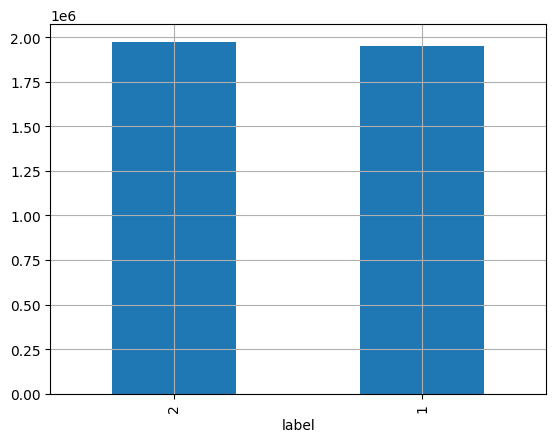

In [18]:
print(df['label'].value_counts())
df['label'].value_counts().plot(kind='bar', grid=True)
plt.show()

label
2    1973362
1    1950896
Name: count, dtype: int64


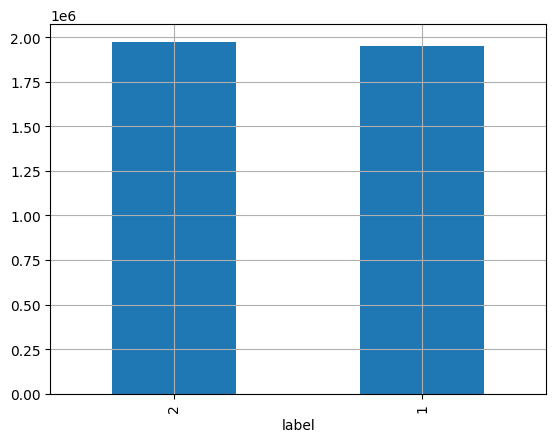

In [19]:
# take only 1,990,000 of each sentiment for balancing and reducing the data a little bit
positive_df = df[df['label'] == 2][:1990000]
negative_df = df[df['label'] == 1][:1990000]

# merging the two setiment data frames in one data frame
df = pd.concat([positive_df, negative_df], axis=0)
df.reset_index()

# delete addtional data frames for controlling memeory the memory
del positive_df, negative_df

# viewing the result
print(df['label'].value_counts())
df['label'].value_counts().plot(kind='bar', grid=True)
plt.show()

In [20]:
from wordcloud import WordCloud
# Function to generate and display a WordCloud
def generate_wordcloud(column_name, color_map, background_color="white"):  
    # Combine all the text in the column into one string
    text = ' '.join(df[column_name].astype(str).tolist())
    
    # Create a WordCloud object
    wordcloud = WordCloud(colormap=color_map, background_color=background_color, collocations=False).generate(text)
    
    # Plot the WordCloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    


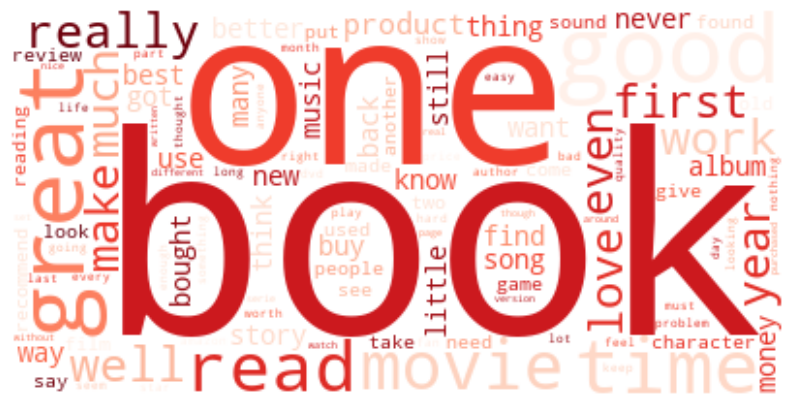

In [21]:
generate_wordcloud('cleaned_text', 'Reds')

In [22]:
df.head()

,title,text,label,text_count,language,cleaned_title,cleaned_text,cleaned_text_count,none_cleaned_review,cleaned_review
0,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,2,75,english,stuning even gamer,sound track beautiful paints senery mind well ...,39,Stuning even for the non-gamer This sound trac...,stuning even gamer sound track beautiful paint...
1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,2,91,english,best soundtrack ever anything,reading lot reviews saying best game soundtrac...,39,The best soundtrack ever to anything. I'm read...,best soundtrack ever anything reading lot revi...
2,Amazing!,This soundtrack is my favorite music of all ti...,2,128,english,amazing,soundtrack favorite music time hands intense s...,67,Amazing! This soundtrack is my favorite music ...,amazing soundtrack favorite music time hands i...
3,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,2,116,english,excellent soundtrack,truly like soundtrack enjoy video game music p...,68,Excellent Soundtrack I truly like this soundtr...,excellent soundtrack truly like soundtrack enj...
4,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",2,77,english,remember pull jaw floor hearing,played game know divine music every single son...,41,"Remember, Pull Your Jaw Off The Floor After He...",remember pull jaw floor hearing played game kn...


# Applying TF-IDF

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.impute import KNNImputer
from sklearn.impute import KNNImputer
from sklearn.naive_bayes import MultinomialNB

In [36]:

x = df['cleaned_text']
y=df['label']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [38]:
tfidf = TfidfVectorizer(max_features=5000)  
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

# Multinomial Naive Bayes

In [42]:
NB = MultinomialNB()  
NB.fit(x_train_tfidf, y_train)
y_pred = NB.predict(x_test_tfidf)

# Evaluate the accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.8227372804044584
Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.82      0.82    390311
           2       0.82      0.83      0.82    394541

    accuracy                           0.82    784852
   macro avg       0.82      0.82      0.82    784852
weighted avg       0.82      0.82      0.82    784852



#  Logistic Regression

In [43]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train_tfidf, y_train)
y_pred = model.predict(x_test_tfidf)

# Evaluate the accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.8680031394453986
Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.86      0.87    390311
           2       0.87      0.87      0.87    394541

    accuracy                           0.87    784852
   macro avg       0.87      0.87      0.87    784852
weighted avg       0.87      0.87      0.87    784852

